In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

In [3]:
rail_train = pd.read_csv("train.csv")
rail_test = pd.read_csv("test.csv")

In [4]:
#copy from original when change, we won't loose original data
train_original = rail_train.copy()
test_original = rail_test.copy()


In [5]:
rail_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null object
Count       18288 non-null int64
dtypes: int64(2), object(1)
memory usage: 428.7+ KB


In [6]:
rail_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
ID          5112 non-null int64
Datetime    5112 non-null object
dtypes: int64(1), object(1)
memory usage: 80.0+ KB


In [7]:
rail_train.shape

(18288, 3)

In [8]:
rail_test.shape

(5112, 2)

In [9]:
rail_train['Datetime'] = pd.to_datetime(rail_train.Datetime, format='%d-%m-%Y %H:%M')
rail_test['Datetime'] = pd.to_datetime(rail_test.Datetime, format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime, format='%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime, format='%d-%m-%Y %H:%M')

In [15]:
for i in (rail_train, rail_test, train_original, test_original):
    i["year"] = i.Datetime.dt.year
    i["month"] = i.Datetime.dt.month
    i["day"] = i.Datetime.dt.day
    i["Hour"] = i.Datetime.dt.hour
    
rail_train['day of week'] = rail_train['Datetime'].dt.dayofweek
temp = rail_train['Datetime']

In [17]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
temp2 = rail_train['Datetime'].apply(applyer)
rail_train['weekend'] = temp2

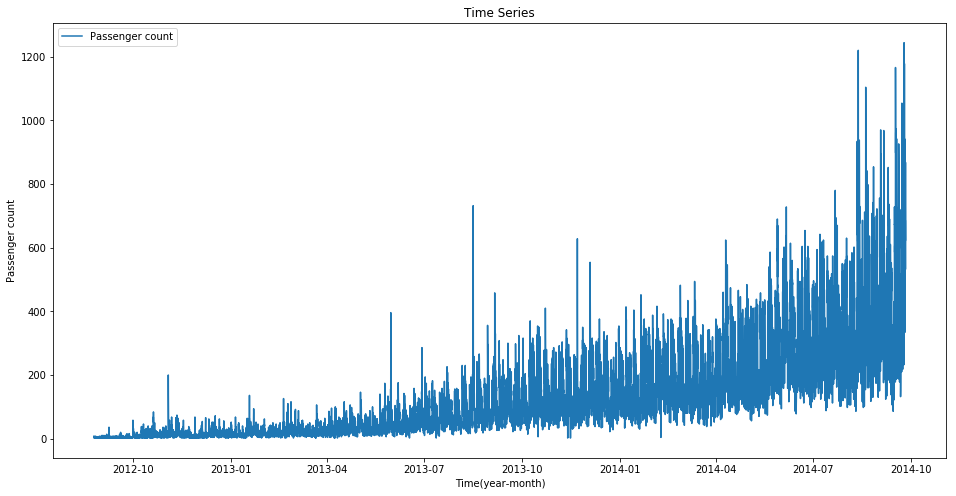

In [19]:
rail_train.index = rail_train['Datetime']
df = rail_train.drop("ID", axis = 1)

ts = df['Count']
plt.figure(figsize = (16,8))
plt.plot(ts, label = "Passenger count")
plt.title("Time Series")
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.legend(loc = "best");

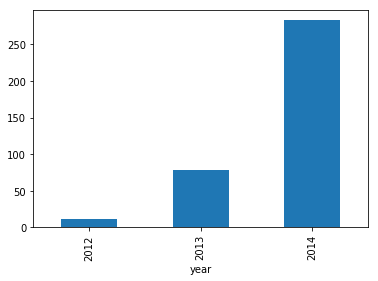

In [20]:
rail_train.groupby("year")["Count"].mean().plot.bar()

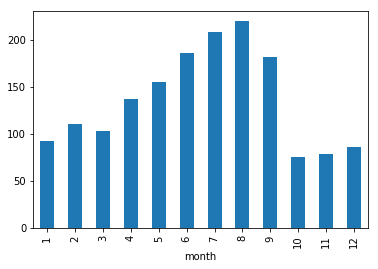

In [21]:
rail_train.groupby("month")["Count"].mean().plot.bar()

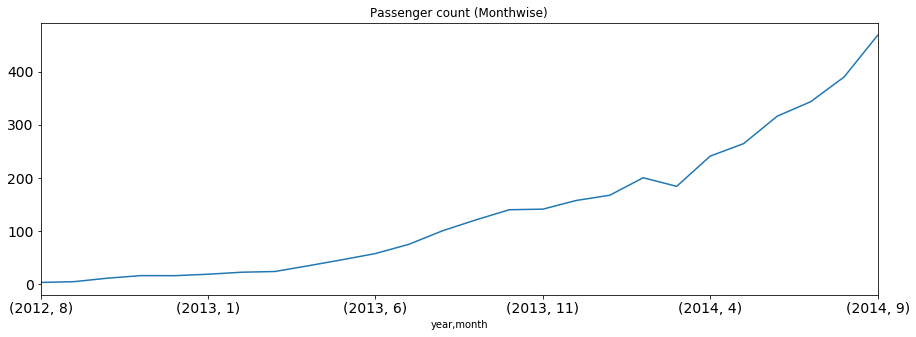

In [22]:
temp = rail_train.groupby(["year", "month"])["Count"].mean()
temp.plot(figsize = (15, 5), title = "Passenger count (Monthwise)", fontsize = 14)

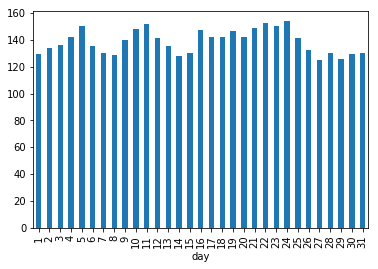

In [25]:
rail_train.groupby('day')['Count'].mean().plot.bar();

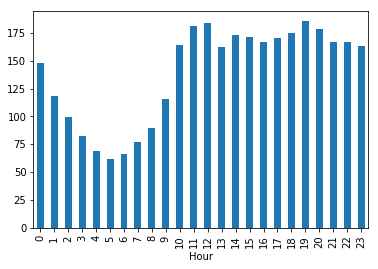

In [26]:
rail_train.groupby('Hour')['Count'].mean().plot.bar();

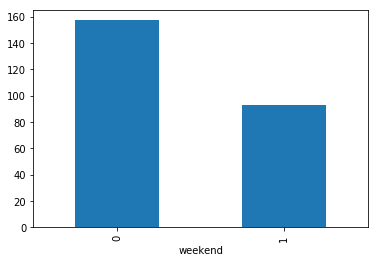

In [27]:
rail_train.groupby('weekend')['Count'].mean().plot.bar();

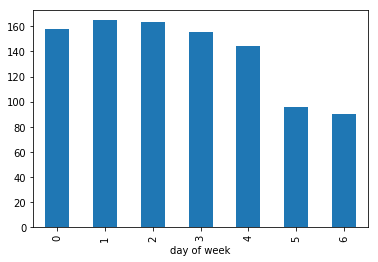

In [28]:
rail_train.groupby('day of week')['Count'].mean().plot.bar();

In [29]:
rail_train = rail_train.drop("ID", axis = 1)

In [30]:
rail_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18288 entries, 2012-08-25 00:00:00 to 2014-09-25 23:00:00
Data columns (total 8 columns):
Datetime       18288 non-null datetime64[ns]
Count          18288 non-null int64
year           18288 non-null int64
month          18288 non-null int64
day            18288 non-null int64
Hour           18288 non-null int64
day of week    18288 non-null int64
weekend        18288 non-null int64
dtypes: datetime64[ns](1), int64(7)
memory usage: 1.3 MB


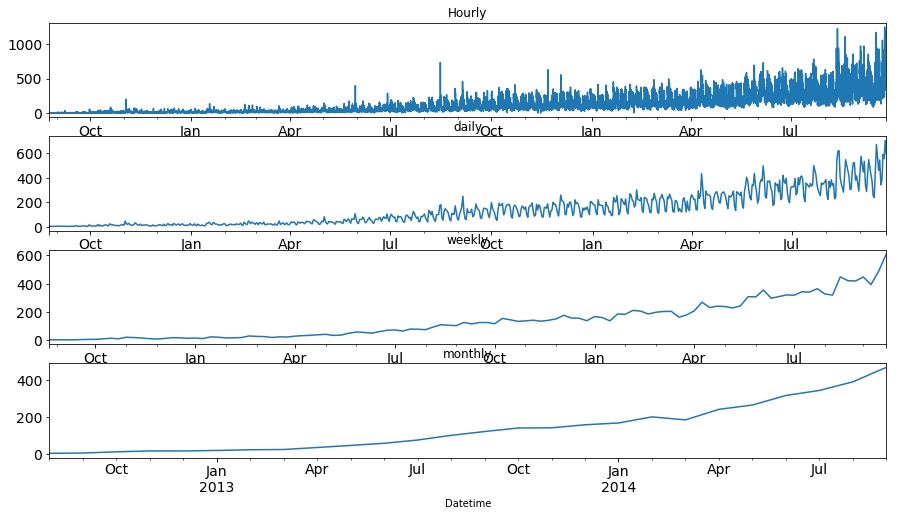

In [32]:
rail_train.Timestamp = pd.to_datetime(rail_train.Datetime, format = "%d-%m-%Y %H:%M")
rail_train.index = rail_train.Timestamp
# hourly
hourly = rail_train.resample("H").mean()
# daily
daily = rail_train.resample("D").mean()
# weekly
weekly = rail_train.resample("W").mean()
# monthly
monthly = rail_train.resample("M").mean()

fig, axs = plt.subplots(4, 1)
hourly.Count.plot(figsize = (15,8), title = "Hourly", fontsize = 14,ax =axs[0])

daily.Count.plot(figsize = (15,8), title = "daily", fontsize = 14,ax =axs[1])

weekly.Count.plot(figsize = (15,8), title = "weekly", fontsize = 14,ax =axs[2])


monthly.Count.plot(figsize = (15,8), title = "monthly", fontsize = 14,ax =axs[3])

plt.show()

In [35]:
rail_test.Timestamp = pd.to_datetime(rail_test.Datetime, format = "%d-%m-%Y %H:%M")
rail_test.index = rail_test.Timestamp

In [36]:
# converting to daily
rail_test = rail_test.resample('D').mean()

In [ ]:
rail_test.in